# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

print("Library berhasil diimpor!")

Library berhasil diimpor!


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
file_path = "/content/hasil_clustering.csv"
df = pd.read_csv(file_path)

print("Beberapa baris awal dari dataset:")
display(df.head())

df.info()

Beberapa baris awal dari dataset:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,balance_category,amount_category,Cluster,Cluster_PCA
0,TX000001,AC00128,-0.971275,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.423718,Doctor,-0.552443,-0.206794,-0.000537,2024-11-04 08:08:08,Negative,Negative,0,0
1,TX000002,AC00455,0.269440,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.311287,Doctor,0.305314,-0.206794,2.216472,2024-11-04 08:09:35,Low,Low,0,0
2,TX000003,AC00019,-0.586882,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.443277,Student,-0.909842,-0.206794,-1.023534,2024-11-04 08:07:04,Negative,Negative,1,1
3,TX000004,AC00070,-0.387456,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.049768,Student,-1.353017,-0.206794,0.885797,2024-11-04 08:09:06,Low,Negative,0,2
4,TX000005,AC00411,-0.973468,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,-1.049768,Student,1.120184,-0.206794,0.593589,2024-11-04 08:06:39,Low,Negative,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2282 non-null   object 
 1   AccountID                2282 non-null   object 
 2   TransactionAmount        2282 non-null   float64
 3   TransactionDate          2282 non-null   object 
 4   TransactionType          2282 non-null   object 
 5   Location                 2282 non-null   object 
 6   DeviceID                 2282 non-null   object 
 7   IP Address               2282 non-null   object 
 8   MerchantID               2282 non-null   object 
 9   Channel                  2282 non-null   object 
 10  CustomerAge              2282 non-null   float64
 11  CustomerOccupation       2282 non-null   object 
 12  TransactionDuration      2282 non-null   float64
 13  LoginAttempts            2282 non-null   float64
 14  AccountBalance          

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
X = df[['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge']]
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data latih: {X_train.shape[0]}, Jumlah data uji: {X_test.shape[0]}")

Jumlah data latih: 1825, Jumlah data uji: 457


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model klasifikasi telah berhasil dilatih.")

Model klasifikasi telah berhasil dilatih.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.96
F1-Score: 0.96


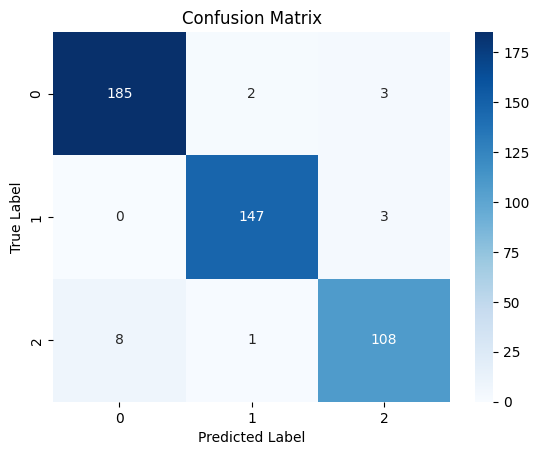


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       190
           1       0.98      0.98      0.98       150
           2       0.95      0.92      0.94       117

    accuracy                           0.96       457
   macro avg       0.96      0.96      0.96       457
weighted avg       0.96      0.96      0.96       457



In [6]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [7]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [8]:
y_pred_tuned = best_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print(f"Accuracy setelah tuning: {accuracy_tuned:.2f}")
print(f"F1-Score setelah tuning: {f1_tuned:.2f}")

Accuracy setelah tuning: 0.96
F1-Score setelah tuning: 0.96


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berdasarkan accuracy 0.96, model tidak mengalami underfitting maupun overfitting, melainkan cukup stabil dan generalizable.

Perbandingan Hasil Sebelum dan Setelah Tuning :
- Accuracy Sebelum Tuning: 0.96
- Accuracy Setelah Tuning: Jika tetap di 0.96

tuning tidak memberikan peningkatan performa yang signifikan. Ini berarti model sudah optimal bahkan dengan parameter default.